In [448]:
import pandas as pd
import numpy as np
import re
from fa2 import ForceAtlas2
import urllib.request
import json
import networkx as nx
import matplotlib.pyplot as plt
import math

In [449]:
def replaceunicode(strInput):
        strInput = strInput.replace(u"\\u00c0", "À")
        strInput = strInput.replace(u"\\u00c1", "Á")
        strInput = strInput.replace(u"\\u00c2", "Â")
        strInput = strInput.replace(u"\\u00c3", "Ã")
        strInput = strInput.replace(u"\\u00c4", "Ä")
        strInput = strInput.replace(u"\\u00c5", "Å")
        strInput = strInput.replace(u"\\u00c6", "Æ")
        strInput = strInput.replace(u"\\u00c7", "Ç")
        strInput = strInput.replace(u"\\u00c8", "È")
        strInput = strInput.replace(u"\\u00c9", "É")
        strInput = strInput.replace(u"\\u00ca", "Ê")
        strInput = strInput.replace(u"\\u00cb", "Ë")
        strInput = strInput.replace(u"\\u00cc", "Ì")
        strInput = strInput.replace(u"\\u00cd", "Í")
        strInput = strInput.replace(u"\\u00ce", "Î")
        strInput = strInput.replace(u"\\u00cf", "Ï")
        strInput = strInput.replace(u"\\u00d1", "Ñ")
        strInput = strInput.replace(u"\\u00d2", "Ò")
        strInput = strInput.replace(u"\\u00d3", "Ó")
        strInput = strInput.replace(u"\\u00d4", "Ô")
        strInput = strInput.replace(u"\\u00d5", "Õ")
        strInput = strInput.replace(u"\\u00d6", "Ö")
        strInput = strInput.replace(u"\\u00d8", "Ø")
        strInput = strInput.replace(u"\\u00d9", "Ù")
        strInput = strInput.replace(u"\\u00da", "Ú")
        strInput = strInput.replace(u"\\u00db", "Û")
        strInput = strInput.replace(u"\\u00dc", "Ü")
        strInput = strInput.replace(u"\\u00dd", "Ý")

        strInput = strInput.replace(u"\\u00df", "ß")
        strInput = strInput.replace(u"\\u00e0", "à")
        strInput = strInput.replace(u"\\u00e1", "á")
        strInput = strInput.replace(u"\\u00e2", "â")
        strInput = strInput.replace(u"\\u00e3", "ã")
        strInput = strInput.replace(u"\\u00e4", "ä")
        strInput = strInput.replace(u"\\u00e5", "å")
        strInput = strInput.replace(u"\\u00e6", "æ")
        strInput = strInput.replace(u"\\u00e7", "ç")
        strInput = strInput.replace(u"\\u00e8", "è")
        strInput = strInput.replace(u"\\u00e9", "é")
        strInput = strInput.replace(u"\\u00ea", "ê")
        strInput = strInput.replace(u"\\u00eb", "ë")
        strInput = strInput.replace(u"\\u00ec", "ì")
        strInput = strInput.replace(u"\\u00ed", "í")
        strInput = strInput.replace(u"\\u00ee", "î")
        strInput = strInput.replace(u"\\u00ef", "ï")
        strInput = strInput.replace(u"\\u00f0", "ð")
        strInput = strInput.replace(u"\\u00f1", "ñ")
        strInput = strInput.replace(u"\\u00f2", "ò")
        strInput = strInput.replace(u"\\u00f3", "ó")
        strInput = strInput.replace(u"\\u00f4", "ô")
        strInput = strInput.replace(u"\\u00f5", "õ")
        strInput = strInput.replace(u"\\u00f6", "ö")
        strInput = strInput.replace(u"\\u00f8", "ø")
        strInput = strInput.replace(u"\\u00f9", "ù")
        strInput = strInput.replace(u"\\u00fa", "ú")
        strInput = strInput.replace(u"\\u00fb", "û")
        strInput = strInput.replace(u"\\u00fc", "ü")
        strInput = strInput.replace(u"\\u00fd", "ý")
        strInput = strInput.replace(u"\\u00ff", "ÿ")


        strOutput = strInput
        return (strOutput)

# Read wiki pages

In [117]:
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
title = "titles=List_of_R%26B_musicians"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
response = urllib.request.urlopen(query)
data = response.read()

wiki = data.decode('utf-8').replace(u"\\u00e9", "é").replace(u"\\u00e1","á").replace(u"\\","")\
                .replace(u"\\u00fd","ý").replace(u"\\u00f3","ó")

In [119]:
pattern = '\*\[\[(.*?)(?:\|.*?)?]\]'
pattern = 'n\* \[\[(.*?)(?:\|.*?)?]\]' # for the hip hop page

In [120]:
rnb = re.findall(pattern, wiki)

In [121]:
df = pd.DataFrame({'name': rnb,'genre':['Rap']*len(rnb)})
df['name_'] = df.name.replace(' ','_',regex=True)

In [122]:
df.head()

,name,genre,name_
0,Aaliyah,Rap,Aaliyah
1,Adele,Rap,Adele
2,After 7,Rap,After_7
3,Jhené Aiko,Rap,Jhené_Aiko
4,Akon,Rap,Akon


In [559]:
pages_path = "./Musicians_files/"

for name in df.name_:
    title = "titles="+urllib.parse.quote_plus(name)
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    response = urllib.request.urlopen(query)
    data = response.read()
    wikitext = data.decode('utf-8').replace(u"\\u00e9", "é").replace(u"\\u00e1","á").replace(u"\\","")\
                                   .replace(u"\\u00fd","ý").replace(u"\\u00f3","ó")
    print(wikitext)
    if "#REDIRECT" in wikitext:
        re_dir = re.findall("REDIRECT[ ]{0,1}\[\[(.*?)(?:\|.*?)?]\]", wikitext)[0].replace(' ','_')
        title = "titles="+urllib.parse.quote_plus(re_dir)
        query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
        response = urllib.request.urlopen(query)
        data = response.read()
        wikitext = data.decode('utf-8')
        #f = open(pages_path + f"{re_dir}.txt","w+")
        #f.write(wikitext)
        #df.loc[df.name_ == name, 'name_w_redir'] = re_dir
    else: pass
        #f = open(pages_path + f"{name}.txt","w+")
        #f.write(wikitext)
        #df.loc[df.name_ == name, 'name_w_redir'] = name

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"pages":{"2144":{"pageid":2144,"ns":0,"title":"Aaliyah","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Short description|American singer, actress, model (1979u20132001)}}n{{About|the American singer|her self-titled album|Aaliyah (album)|other uses|Aaliyah (disambiguation)}}n{{Distinguish|Aliyah}}n{{Pp-semi-indef}}n{{Pp-move-indef}}n{{Featured article}}n{{Use American English|date=July 2020}}n{{Use mdy dates|date=August 2021}}n{{Infobox p

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"pages":{"13041163":{"pageid":13041163,"ns":0,"title":"Adele","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{short description|English singer and songwriter (born 1988)}}n{{Other uses}}n{{pp-semi-blp|small=yes}}n{{Use British English|date=December 2020}}n{{Use dmy dates|date=October 2021}}n{{Infobox personn| name               = Adelen| honorific_suffix   = {{post-nominals|country=GBR|size=100%|MBE}}n| image              = Adele 2016.jpg

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"After_7","to":"After 7"}],"pages":{"219638":{"pageid":219638,"ns":0,"title":"After 7","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Use mdy dates|date=May 2020}}n{{about|the group|the group's eponymous album|After 7 (album)}}n{{short description|American band}}n{{Infobox musical artistn| name            = After 7n| image           =n| caption         =n| image_size      = <!-- Only for images narrower than 220 pix

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Jhené_Aiko","to":"Jhené Aiko"}],"pages":{"14201324":{"pageid":14201324,"ns":0,"title":"Jhené Aiko","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{short description|American singer from California}}n{{pp-pc1}}n{{Use mdy dates|date=June 2021}}n{{Infobox musical artistn| name            = Jhené Aikon| image           = Jhené Aiko (cropped).jpgn| image_upright   =n| caption         = Aiko performing in 2016n| birth_nam

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"pages":{"5570621":{"pageid":5570621,"ns":0,"title":"Akon","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Short description|Senegalese-American singer, songwriter, and record producer from New Jersey}}n{{Distinguish|Acon (disambiguation){{!}}Acon|A-Kon|Abdus Sattar Akon}}n{{Use mdy dates|date=February 2019}}n{{pp-semi-blp|small=yes}}n{{Infobox personn| name               = Akonn| image              = Akon in July 2015 (cropped).jpgn| cap

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Al_B._Sure!","to":"Al B. Sure!"}],"pages":{"3054621":{"pageid":3054621,"ns":0,"title":"Al B. Sure!","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Short description|American new jack swing singer-songwriter}}n{{Use mdy dates|date=May 2021}}n{{Infobox musical artistn| name            = Al B. Sure!n| image           = Al B Sure in 2020.jpgn| caption         = Brown in 2020n| birth_name      = Albert Joseph Brown IIIn

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"pages":{"1729761":{"pageid":1729761,"ns":0,"title":"All-4-One","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{About|the R&B group|their debut album|All-4-One (All-4-One album)||All for one (disambiguation){{!}}All for one}}n{{Refimprove|date=April 2012}}n{{Infobox musical artistn| name            = All-4-Onen| image           = All-4-One in Bangkok.jpgn| caption         = All-4-One in Bangkok.n| origin          = [[Antelope Valley]], [[

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"All_Saints_(group)","to":"All Saints (group)"}],"pages":{"54332714":{"pageid":54332714,"ns":0,"title":"All Saints (group)","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{EngvarB|date=June 2015}}n{{Use dmy dates|date=June 2015}}n{{More citations needed|date=August 2010}}n{{Infobox musical artistn| name            = All Saintsn| image           = All Saints in 2007.jpgn| caption         = All Saints performing in 200

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Allure_(band)","to":"Allure (band)"}],"pages":{"63215604":{"pageid":63215604,"ns":0,"title":"Allure (band)","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"#REDIRECT [[Allure (group)]]nn{{Redirect category shell|n{{R from move}}n}}"}]}}}}
{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimed

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Marsha_Ambrosius","to":"Marsha Ambrosius"}],"pages":{"1673544":{"pageid":1673544,"ns":0,"title":"Marsha Ambrosius","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Use British English|date=January 2014}}n{{Use dmy dates|date=January 2014}}n{{Infobox musical artistn| name             = Marsha Ambrosiusn| image            = Floetry.New (cropped) - Marsha Ambrosius.jpgn| caption          = Ambrosius in 2016n| background

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"pages":{"762846":{"pageid":762846,"ns":0,"title":"Amerie","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Short description|American singer-songwriter, record producer}}n{{BLP primary sources|date=April 2019}}n{{Infobox musical artist<!-- See Wikipedia:WikiProject Musicians -->n| name             = Amerien| image            = Amerie, Red Dress Collection 2006.jpgn| caption          = Amerie in 2006n| birth_name       = Amerie Mi Marie Ro

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Another_Bad_Creation","to":"Another Bad Creation"}],"pages":{"584495":{"pageid":584495,"ns":0,"title":"Another Bad Creation","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Use mdy dates|date=December 2014}}n{{Infobox musical artistn| name            = Another Bad Creationn| image           = <!-- Put only isis the imdjdhxage name (e.g. Example.png) without the Image: prefix. -->n| caption         =n| image_size    

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"pages":{"1049306":{"pageid":1049306,"ns":0,"title":"Anquette","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{short description|American contemporary R&B group}}n{{Infobox musical artistn| name            = Anquetten| image           =n| image_size      =n| image_upright   =n| landscape       = <!-- yes, if wide image, otherwise leave blank -->n| alt             =n| caption         =n| alias           =n| origin          = [[Miami, Flori

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Ashford_&_Simpson","to":"Ashford & Simpson"}],"pages":{"1408332":{"pageid":1408332,"ns":0,"title":"Ashford & Simpson","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Use mdy dates|date=August 2014}}n{{BLP sources|date=April 2010}}n{{Infobox musical artistn| name            = Ashford & Simpsonn| image           = Ashford_and_Simpson.jpgn| caption         =n| image_size      =n| alias           =n| origin          = [

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"ATL_(band)","to":"ATL (band)"}],"pages":{"63215600":{"pageid":63215600,"ns":0,"title":"ATL (band)","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"#REDIRECT [[ATL (group)]]nn{{Redirect category shell|n{{R from move}}n}}"}]}}}}
{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Avant_(singer)","to":"Avant (singer)"}],"pages":{"1165199":{"pageid":1165199,"ns":0,"title":"Avant (singer)","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{short description|American R&B singer and songwriter}}n{{BLP sources|date=February 2021}}n{{Use mdy dates|date=December 2019}}n{{Infobox musical artistn| name            = Avantn| image_size      =n| caption         =n| birth_name      = Myron Lavell Avantn| bir

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"pages":{"47512307":{"pageid":47512307,"ns":0,"title":"Ayushita","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Short description|Indonesia singer, actress, dancer (born 1989)}}n{{Infobox personn| name         = Ayushitan| image        =n| caption      =n| birth_name   = Ayushita Widyartoeti Nugrahan| birth_date   = {{birth date and age|1989|06|09|mf=yes}}n| birth_place  = [[Jakarta]], Indonesian| death_date   =n| death_place  =n| parent

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"pages":{"47775265":{"pageid":47775265,"ns":0,"title":"Aziatix","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Infobox musical artistn| name            = Aziatixn| image           = File:Aziatix.jpgn| caption         = Flowsik, Eddie, and Nicky in 2012n| landscape       = yesn| genre           = [[Hip hop music|Hip hop]], [[R&B]]n| years_active    = 2011u20132015n| label           = Astar, Inc.<br/>[[Cash Money Records]]n| website       

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"pages":{"162094":{"pageid":162094,"ns":0,"title":"B2K","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{short description|American R&B music group}}n{{about|a boy band|the dating system (years before 2000 CE)|Before Present|the type of train|Docklands Light Railway rolling stock}} nn{{More citations needed|date=January 2020}}n{{Infobox musical artistn| name            = Boys of the New Milleniumn| image           =n| caption         =n| i

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"B5_(band)","to":"B5 (band)"}],"pages":{"37186650":{"pageid":37186650,"ns":0,"title":"B5 (band)","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"#REDIRECT [[B5 (group)]]"}]}}}}
{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. U

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Backstreet_Boys","to":"Backstreet Boys"}],"pages":{"11778870":{"pageid":11778870,"ns":0,"title":"Backstreet Boys","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Short description|American boy band}}n{{Use mdy dates|date=January 2020}}n{{Infobox musical artistn| name            = Backstreet Boysn| image           = Backstreet Boys 2019 by Glenn Francis.jpgn| landscape       = yesn| caption         = Backstreet Boys 

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Ricco_Barrino","to":"Ricco Barrino"}],"pages":{"29136308":{"pageid":29136308,"ns":0,"title":"Ricco Barrino","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Use mdy dates|date=May 2020}}n{{Infobox musical artistn| name            = Ricco Barrinon| image           =n| caption         =n| birth_name      = Vonricco Washingtonn| alias           =n| birth_date      = {{birth date and age|1980|03|20}}n| birth_place     = 

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Bell_Biv_DeVoe","to":"Bell Biv DeVoe"}],"pages":{"583084":{"pageid":583084,"ns":0,"title":"Bell Biv DeVoe","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{short description|American band}}n{{Infobox musical artistn| name            = Bell Biv DeVoen| image           = New Edition on Sister Circle Live.jpgn| caption         = Members with [[Bobby Brown]] as New Edition during a 2018 interview.   From left to right: R

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Before_Dark","to":"Before Dark"}],"pages":{"3497288":{"pageid":3497288,"ns":0,"title":"Before Dark","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Short description|American R&B girl group}}n{{BLP sources|date=January 2014}}n{{Infobox musical artistn| name            = Before Darkn| image           = Before or After Dark.jpgn| alt             = Two girls are sitting down while a third girl to the left is leaning to

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"pages":{"83688":{"pageid":83688,"ns":0,"title":"Beyoncé","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Short description|American singer, songwriter, and actress}}n{{Other uses}}n{{pp-move-indef}}n{{pp-semi-blp|small=yes}}n{{Use American English|date=September 2020}}n{{Use mdy dates|date=July 2021}}n{{Infobox personn| name               = Beyoncén| image              = Beyoncé at The Lion King European Premiere 2019.pngn| alt          

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Justin_Bieber","to":"Justin Bieber"}],"pages":{"23680998":{"pageid":23680998,"ns":0,"title":"Justin Bieber","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{short description|Canadian singer}}n{{redirect|Bieber}}n{{pp-move-indef|small=yes}}n{{pp-semi-blp|small=yes}}n{{Use Canadian English|date=December 2015}}n{{Use mdy dates|date=November 2018}}n{{Infobox personn| name               = Justin Biebern| image           

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Aloe_Blacc","to":"Aloe Blacc"}],"pages":{"8457028":{"pageid":8457028,"ns":0,"title":"Aloe Blacc","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Short description|American musician}}n{{Use mdy dates|date=October 2013}}n{{Infobox personn| name               = Aloe Blaccn| image              = Aloe Blacc 2011.jpgn| caption            = Blacc at Festival Mundial in [[Tilburg]] on June 19, 2011n| birth_name         = Eg

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"pages":{"215906":{"pageid":215906,"ns":0,"title":"Blackstreet","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Short description|American R&B group}}n{{Use American English|date=April 2021}}n{{Infobox musical artistn| name            = Blackstreetn| image           =n| origin          = [[New York City]], [[New York (state)|New York]], U.S.n| genre           = {{hlist|[[Contemporary R&B|R&B]]|[[Soul music|soul]]|[[funk]]|[[new jack swing

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Mary_J._Blige","to":"Mary J. Blige"}],"pages":{"214210":{"pageid":214210,"ns":0,"title":"Mary J. Blige","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{short description|American singer (born 1971)}}n{{Use mdy dates|date=February 2020}}n{{Infobox personn| name               = Mary J. Bligen| image              = Mary J. Blige April 2020.pngn| caption            = Blige during an interview in April 2020n| birth_name 

{"batchcomplete":"","query":{"normalized":[{"from":"Jasu00ebn_Blu","to":"Jasu00ebn Blu"}],"pages":{"-1":{"ns":0,"title":"Jasu00ebn Blu","missing":""}}}}
{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Blu_Cantrell","to":"Blu Cantrell"}],"pages":{"168873":{"pageid":168873,"ns":0,"title":"Blu Cantrell","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{short description|American R&B and soul singer-songwriter|bot=PearBOT 5}}n{{BLP sources|date=January 2009}}n{{Use Ame

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Blue_Magic_(band)","to":"Blue Magic (band)"}],"pages":{"2243426":{"pageid":2243426,"ns":0,"title":"Blue Magic (band)","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{More citations needed|date=August 2020}}n{{Infobox musical artistn| name             = Blue Magicn| image            = Blue Magic promo pic early 70's.JPGn| caption          = Blue Magic Promo Photo in 1973n| origin           = [[Philadelphia, Pennsylva

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Boyz_II_Men","to":"Boyz II Men"}],"pages":{"161232":{"pageid":161232,"ns":0,"title":"Boyz II Men","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{short description|American vocal group}}n{{redirect|Boys II Men|the album by Maskinen|Boys II Men (album)|other uses|Boys to Men (disambiguation)}}n{{Infobox musical artistn| name            = Boyz II Menn| image           = Boyz II Men - Walmart (1).jpgn| alias           

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Black_Buddafly","to":"Black Buddafly"}],"pages":{"3951874":{"pageid":3951874,"ns":0,"title":"Black Buddafly","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{Infobox musical artistn| name            = Black Buddaflyn| image           =n| years_active    = 2005u2013Presentn| genre           = [[Contemporary R&B|R&B]], [[Soul music|soul]]n| label           = [[Def Jam]] <small>(2005u20132007)</small><br> MBK Records/[[

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"pages":{"261150":{"pageid":261150,"ns":0,"title":"BoA","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{short description|South Korean singer}}n{{about|the South Korean singer|other uses|Boa (disambiguation)}}n{{Use mdy dates|date=January 2020}}n{{Infobox personn| name            = BoAn| image           = 180417 ubcf4uc544 02.pngn| caption         = BoA in April 2018n| birth_name      = Kwon Bo-ahn| alias           = n| height          = 

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Tyra_Bolling","to":"Tyra Bolling"}],"pages":{"4215999":{"pageid":4215999,"ns":0,"title":"Tyra Bolling","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{BLP sources|date=January 2008}}n{{Infobox personn| name = Tyra Bn| image =n| birth_name = Tyra Shardell Bollingn| birth_date = {{birth date and age|1985|6|27}}n| birth_place = [[Petersburg, Virginia]], U.S.n| occupation = {{flatlist|n* Singern* songwritern* dancern}}n

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Brandy_Norwood","to":"Brandy Norwood"}],"pages":{"144809":{"pageid":144809,"ns":0,"title":"Brandy Norwood","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{short description|American singer and actress from Mississippi}}n{{Use American English|date=August 2020}}n{{Use mdy dates|date=December 2015}}n{{Infobox personn| name               = Brandyn| image              = Brandy Norwood3.jpgn| alt                = Picture

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because "rvslots" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"Tamar_Braxton","to":"Tamar Braxton"}],"pages":{"1626277":{"pageid":1626277,"ns":0,"title":"Tamar Braxton","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{short description|American singer and television personality}}n{{Use mdy dates|date=May 2020}}n{{Infobox person n| name = Tamar Braxtonn| image = Tamar Braxton V-100 Meet & Greet.jpgn| caption = Braxton in 2013n| birth_name = Tamar Estine Braxtonn| birth_date = {{B

KeyboardInterrupt: 

In [124]:
#FLAME redirects here; for the rapper see Flame (rapper)

# Read data

In [288]:
df_rnb = pd.read_csv('./df_rnb.csv', index_col=0)
df_pop = pd.read_csv('./df_pop.csv', index_col=0)
df_rap = pd.read_csv('./df_rap.csv', index_col=0)

In [141]:
frames = [df_rnb, df_pop, df_rap]
result = pd.concat(frames)

In [147]:
df = result.copy()

In [290]:
df.head()

,index,name,genre,name_,link_name,origin
0,0,Aaliyah,RnB,Aaliyah,Aaliyah,New York City
1,1,Adele,RnB,Adele,Adele,London
2,2,After 7,RnB,After_7,After_7,"Indianapolis, Indiana"
3,3,Jhené Aiko,RnB,Jhené_Aiko,Jhené_Aiko,Los Angeles
4,4,Akon,RnB,Akon,Akon,St. Louis


In [154]:
df=df.rename(columns={'name_w_redir':'link_name'})

In [256]:
df=df.drop_duplicates(subset='link_name').reset_index()

<AxesSubplot:xlabel='genre'>

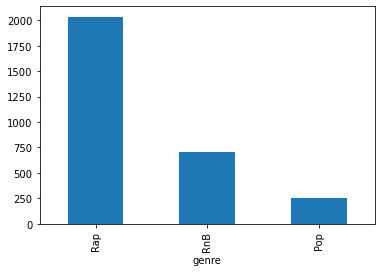

In [560]:
df.value_counts('genre').plot.bar()

# Create network

In [176]:
DG = nx.DiGraph() #Creating directed graph 
DG.add_nodes_from(df['link_name']) #Adding one node for each character
node_attr = df[['link_name','genre']].set_index('link_name').to_dict('index') #Creating a dictionary with the characters and their attributes
nx.set_node_attributes(DG, node_attr) #Adding attributes to the graph

In [177]:
pattern = '\[\[(.*?)(?:\|.*?)?]\]'

for i in df.link_name:
    with open(pages_path+i+".txt","r") as f:              #open all characters txt files
        node_links = f.read()                             #read txt file
        word_count=len(re.findall(r'\w+', node_links))
        link_list = re.findall(pattern, node_links)     #using pattern to find links
        DG.nodes[i]['length'] = word_count
        for j in link_list:
            j = j.replace(' ','_')
            if j in df.link_name.values:
                DG.add_edge(i,j)                           #adding edges

In [178]:
print("The network consist of: ", DG.number_of_edges(), " links")
print("The network consist of: ", DG.number_of_nodes(), " nodes (musicians)")

The network consist of:  36644  links
The network consist of:  2995  nodes (musicians)


In [179]:
largest_cc = max(nx.weakly_connected_components(DG), key=len)
sub_G=DG.subgraph(largest_cc).copy()
#Saving the largest component as a undirected network
G = sub_G.to_undirected()

In [180]:
#Getting the top connected character in BotW (in-degree)
top_20 = sorted(G.degree, key=lambda x: x[1], reverse=True)[:20]
top_20

[('Kanye_West', 317),
 ('Jay-Z', 314),
 ('Lil_Wayne', 302),
 ('Snoop_Dogg', 284),
 ('Eminem', 282),
 ('Nas', 236),
 ('Michael_Jackson', 210),
 ('50_Cent', 210),
 ('T.I.', 210),
 ('Busta_Rhymes', 208),
 ('Tupac_Shakur', 205),
 ('Dr._Dre', 193),
 ('Kendrick_Lamar', 189),
 ('Beyoncé', 186),
 ('Drake_(musician)', 186),
 ('Nicki_Minaj', 181),
 ('Rihanna', 177),
 ('Rick_Ross', 177),
 ('Chris_Brown', 172),
 ('Mariah_Carey', 164)]

# Draw network

In [193]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=0.2,
                        #multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=100,
                        strongGravityMode=False,
                        gravity=0.2,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=100)

100%|█████████████████████████████████████████| 100/100 [00:23<00:00,  4.19it/s]

BarnesHut Approximation  took  1.36  seconds
Repulsion forces  took  22.18  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.06  seconds


In [181]:
#node size
d = dict(G.degree)
deg_size = [v * 7 for v in d.values()]

In [182]:
nodes_color = []
for node in G.nodes.data():
    if node[1]['genre'] == 'RnB':
        nodes_color.append('#008080')
    elif (node[1]['genre'] == 'Pop'):
        nodes_color.append('#DA70D6')
    else:
        nodes_color.append('#4B0082')

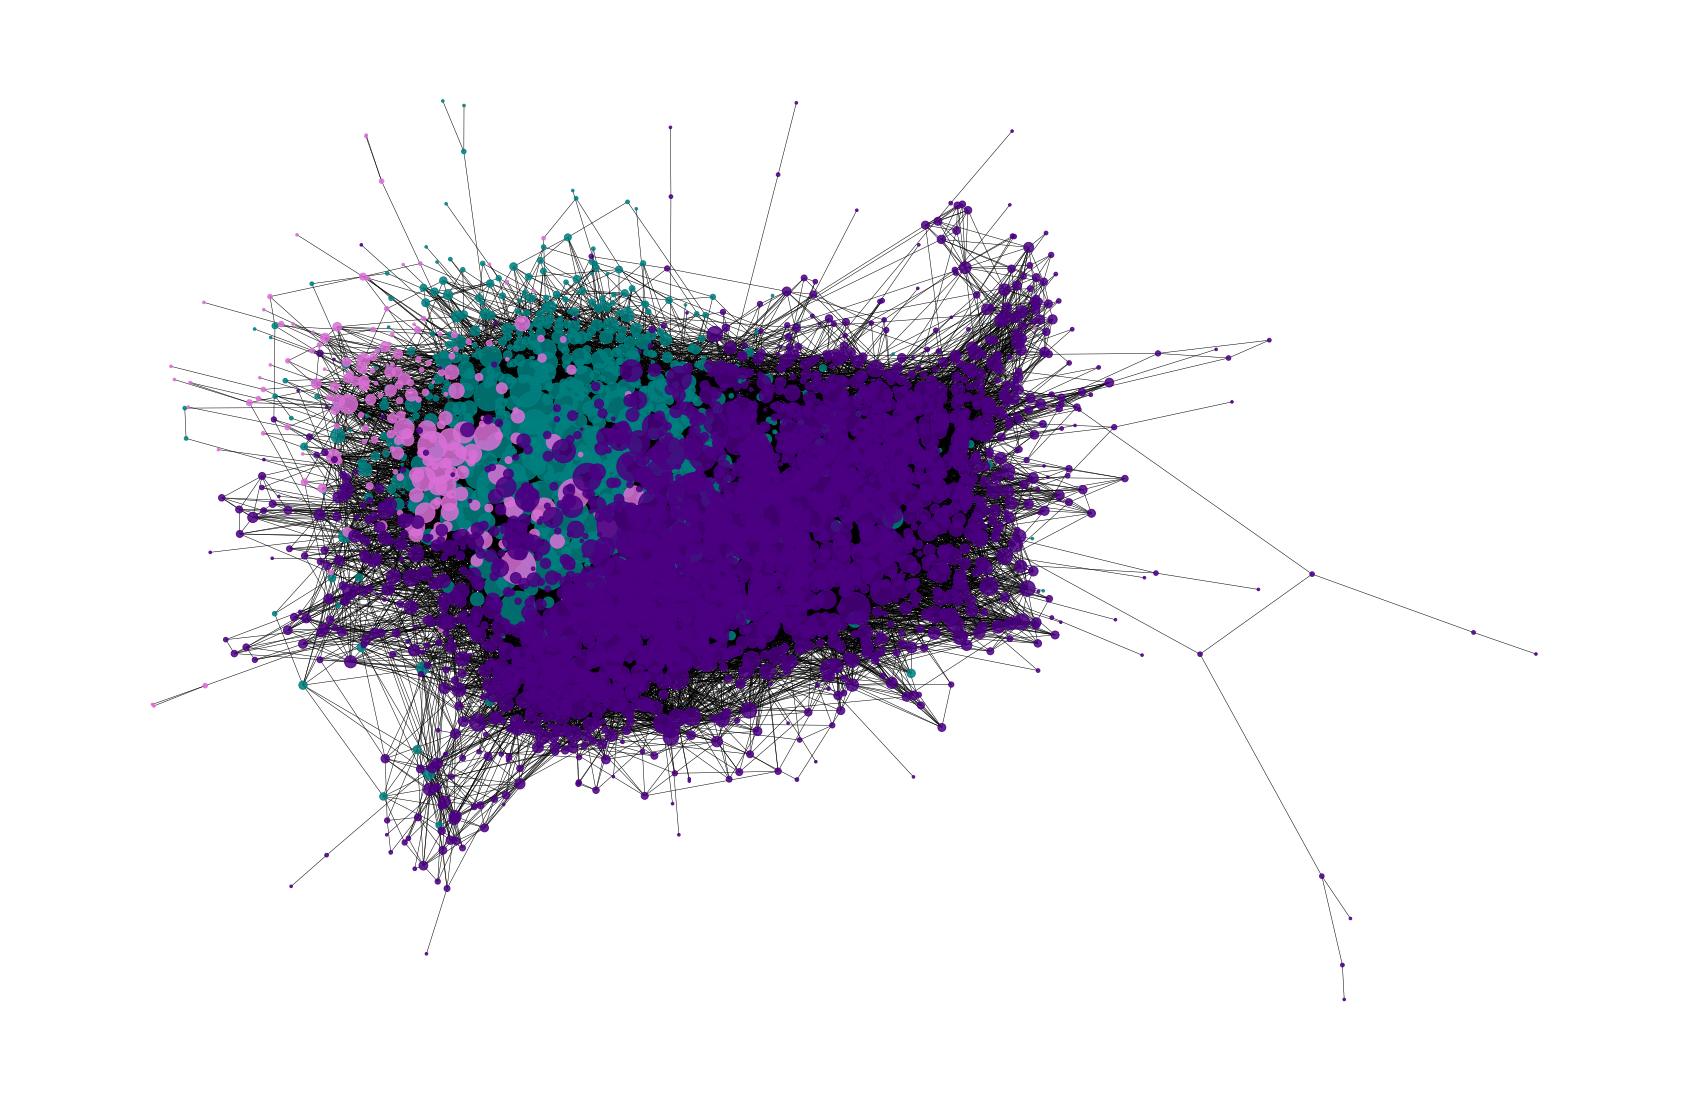

In [197]:
plt.figure(figsize=(30,20))
nx.draw_networkx_nodes(G, positions, node_size=deg_size, node_color=nodes_color, alpha=0.85)
nx.draw_networkx_edges(G, positions, width = 0.5)#, edge_color=edge_colors,width=0.5)
plt.axis('off')
plt.show()

# Add origin

In [227]:
origin_pattern1 = 'birth_place += +(?:\.*?)\[\[(.*?)(?:\|.*?)?]\]'
origin_pattern2 = 'origin += +(?:\.*?)\[\[(.*?)(?:\|.*?)?]\]'

In [292]:
for name in df.link_name:
    with open(pages_path+name+".txt","r") as f:
        txtfile = f.read()
        origin = re.findall(origin_pattern1, txtfile)
        if not origin:
            origin = re.findall(origin_pattern2, txtfile)
        if len(origin) > 0:
            df.loc[df.link_name==name,'origin'] = " ".join(origin)          
        else:
            df.loc[df.link_name==name,'origin'] = 'Unknown'

In [294]:
df.head()

,index,name,genre,name_,link_name,origin
0,0,Aaliyah,RnB,Aaliyah,Aaliyah,New York City
1,1,Adele,RnB,Adele,Adele,London
2,2,After 7,RnB,After_7,After_7,"Indianapolis, Indiana"
3,3,Jhené Aiko,RnB,Jhené_Aiko,Jhené_Aiko,Los Angeles
4,4,Akon,RnB,Akon,Akon,St. Louis


In [230]:
import requests

In [279]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="s184288@student.dtu.dk")

Flatiron Building, 175, 5th Avenue, Manhattan Community Board 5, Manhattan, New York County, New York, 10010, United States
(40.741059199999995, -73.98964162240998)


In [313]:
for i in range(len(df.origin)):
    orig = df.loc[i]['origin']
    if orig == 'Unknown':
        continue
    else:
        try: 
            location = geolocator.geocode(orig)
        except: pass
        if location != None:
            df.loc[i,'lat'] = location.latitude
            df.loc[i,'lon'] = location.longitude

            else: pass

In [319]:
df.to_csv('df_w_loc.csv')

In [317]:
df=df.drop(['lat_lon','index'],axis=1)

# Pyvis

In [329]:
from pyvis.network import Network

In [433]:
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white',notebook=True)

# set the physics layout of the network
net.barnes_hut()

In [434]:
test=[a_tuple[0] for a_tuple in sorted(G.degree, key=lambda x: x[1], reverse=True)[:100]]

In [435]:
test_G = G.subgraph(test)

In [436]:
net.from_nx(test_G)
neighbors = net.get_adj_list()

for node in net.nodes:
    #node['title'] += ' Neighbors:<br>' + ''.join(neighbors[node['id']])
    node['value'] = len(neighbors[node['id']])


In [437]:
net.show('example.html')

## add degrees

In [456]:
degrees = [val for (node, val) in DG.degree()]
df['degree'] = degrees

In [458]:
df['degree'] = degrees

In [469]:
df.groupby('genre').apply(lambda x: x.nlargest(10, 'degree')).reset_index(drop=True)

,name,genre,name_,link_name,origin,lat,lon,degree
0,Nicki Minaj,Pop,Nicki_Minaj,Nicki_Minaj,"Saint James, Trinidad and Tobago",10.684711,-61.535612,227
1,Britney Spears,Pop,Britney_Spears,Britney_Spears,"McComb, Mississippi",31.243415,-90.472919,165
2,Timbaland,Pop,Timbaland,Timbaland,"Norfolk, Virginia",36.896805,-76.260234,165
3,Christina Aguilera,Pop,Christina_Aguilera,Christina_Aguilera,Unknown,25.029422,-77.361956,134
4,Lady Gaga,Pop,Lady_Gaga,Lady_Gaga,New York City,40.712728,-74.006015,113
5,Katy Perry,Pop,Katy_Perry,Katy_Perry,"Santa Barbara, California",34.422132,-119.702667,99
6,Flo Rida,Pop,Flo_Rida,Flo_Rida,Unknown,25.029422,-77.361956,96
7,Madonna,Pop,Madonna,Madonna,"Bay City, Michigan",43.594468,-83.888865,92
8,Celine Dion,Pop,Celine_Dion,Celine_Dion,"Charlemagne, Quebec",45.725520,-73.489692,83
9,David Guetta,Pop,David_Guetta,David_Guetta,Paris,48.858890,2.320041,83


# Map

In [473]:
import cartopy.crs as ccrs

In [571]:
df_map = df[df.lat.isna()==False]

In [572]:
pos_dict=df_map[df_map.name.isin(largest_cc)].set_index('link_name')[['lon','lat']].agg(tuple, 1).to_dict()
test_G = G.subgraph(list(pos_dict.keys()))

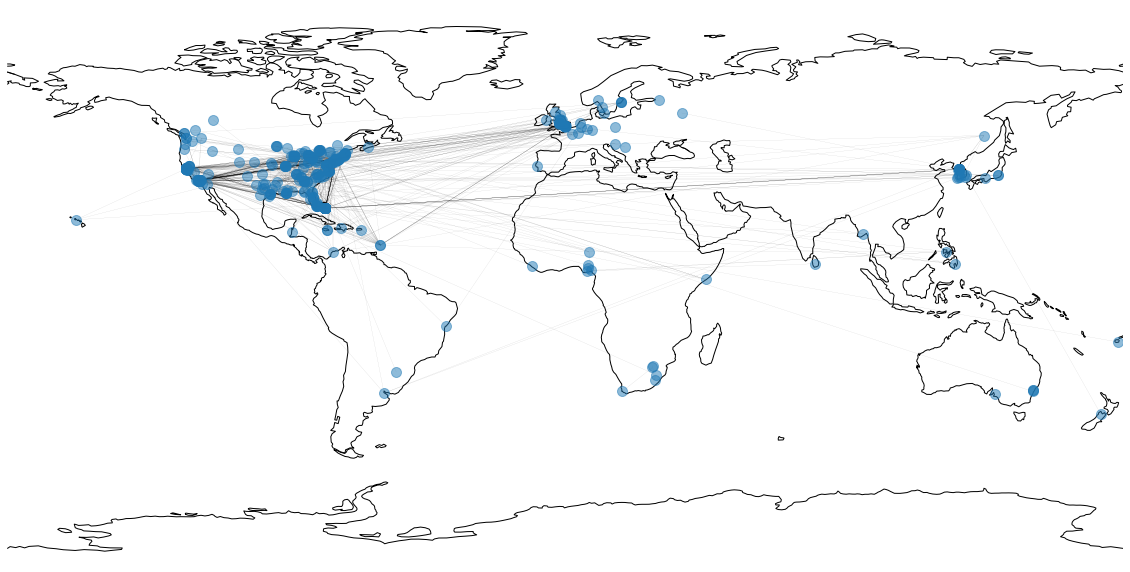

In [578]:
# Map projection
crs = ccrs.PlateCarree(central_longitude=0)
fig, ax = plt.subplots(1, 1, figsize=(20, 14), subplot_kw=dict(projection=crs))
ax.coastlines()
ax.set_global()
nx.draw(test_G, ax=ax,
                 font_size=2,
                 alpha=.5,
                 width=.075,
                 node_size=100,
                 #labels=False,
                 pos=pos_dict,
                 #node_color=altitudes,
                 cmap=plt.cm.autumn)

In [564]:
#group_orig = df_map.groupby(['origin','lat','lon']).count().reset_index().drop(['genre','name_','degree'],axis=1)
import plotly.express as px
import plotly.graph_objects as go

In [577]:
import plotly.express as px
import plotly.graph_objects as go
dist_plot = df.groupby('genre')['name'].count().sort_values(ascending=False)

fig = px.bar(dist_plot, y=dist_plot.values, x=dist_plot.index, text=dist_plot.values)
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
                  plot_bgcolor='rgba(0,0,0,0)',
                  yaxis_title="Count",
                  xaxis_title="")
fig.update_xaxes(showline=True, linewidth=1, linecolor='lightgrey', 
                 showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showline=True, linewidth=1, linecolor='lightgrey',
                 showgrid=True, gridwidth=1, gridcolor='lightgrey')

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.show()

In [566]:
dist_plot

degree
0      AnquetteAyushitaAziatixJasu00ebn BluChristionC...
1      Black BuddaflyBrick (band)Sister Wynona CarrCo...
2      ATL (band)BruthaCassieCleopatra (girl group)DR...
3      Ex Girlfriend (band)Exo (group)Ideal (band)Jon...
4      Before DarkDivine BrownJay ChouAlex ClareClub ...
                             ...                        
328                                           Snoop Dogg
349                                            Lil Wayne
360                                                Jay Z
363                                               Eminem
380                                           Kanye West
Name: name, Length: 171, dtype: object

In [582]:
net.show('example.html')